In [1]:
print("hello, world!")

hello, world!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/machine_temperature_system_failure.csv')


In [4]:
print(df)

                 timestamp      value
0      2013-12-02 21:15:00  73.967322
1      2013-12-02 21:20:00  74.935882
2      2013-12-02 21:25:00  76.124162
3      2013-12-02 21:30:00  78.140707
4      2013-12-02 21:35:00  79.329836
...                    ...        ...
22690  2014-02-19 15:05:00  98.185415
22691  2014-02-19 15:10:00  97.804168
22692  2014-02-19 15:15:00  97.135468
22693  2014-02-19 15:20:00  98.056852
22694  2014-02-19 15:25:00  96.903861

[22695 rows x 2 columns]


In [5]:
# Calculate the moving average of the temperature readings
window_size = 200 # MODIFICATION, original was 50
ma = df['value'].rolling(window_size).mean()

In [6]:
print(ma)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
22690    93.310113
22691    93.341778
22692    93.368746
22693    93.392867
22694    93.414094
Name: value, Length: 22695, dtype: float64


In [8]:
deviation = df['value'] - ma

In [9]:
# Calculate the standard deviation of the deviation
std_deviation = deviation.rolling(window_size).std()

In [10]:
print(std_deviation)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
22690    2.011248
22691    2.023690
22692    2.031382
22693    2.045966
22694    2.052535
Name: value, Length: 22695, dtype: float64


In [11]:
# Calculate the threshold for anomaly detection
threshold = 3 * std_deviation

# Detect anomalies based on deviations from the moving average
anomalies = df[deviation.abs() > threshold]

In [15]:
print(anomalies)

                 timestamp      value
734    2013-12-05 10:25:00  69.693368
737    2013-12-05 10:40:00  69.623285
738    2013-12-05 10:45:00  69.682566
745    2013-12-05 11:20:00  69.058279
749    2013-12-05 11:40:00  68.560754
...                    ...        ...
22397  2014-02-18 14:40:00  83.731850
22398  2014-02-18 14:45:00  82.953906
22399  2014-02-18 14:50:00  80.969539
22400  2014-02-18 14:55:00  82.222039
22401  2014-02-18 15:00:00  84.827809

[1121 rows x 2 columns]


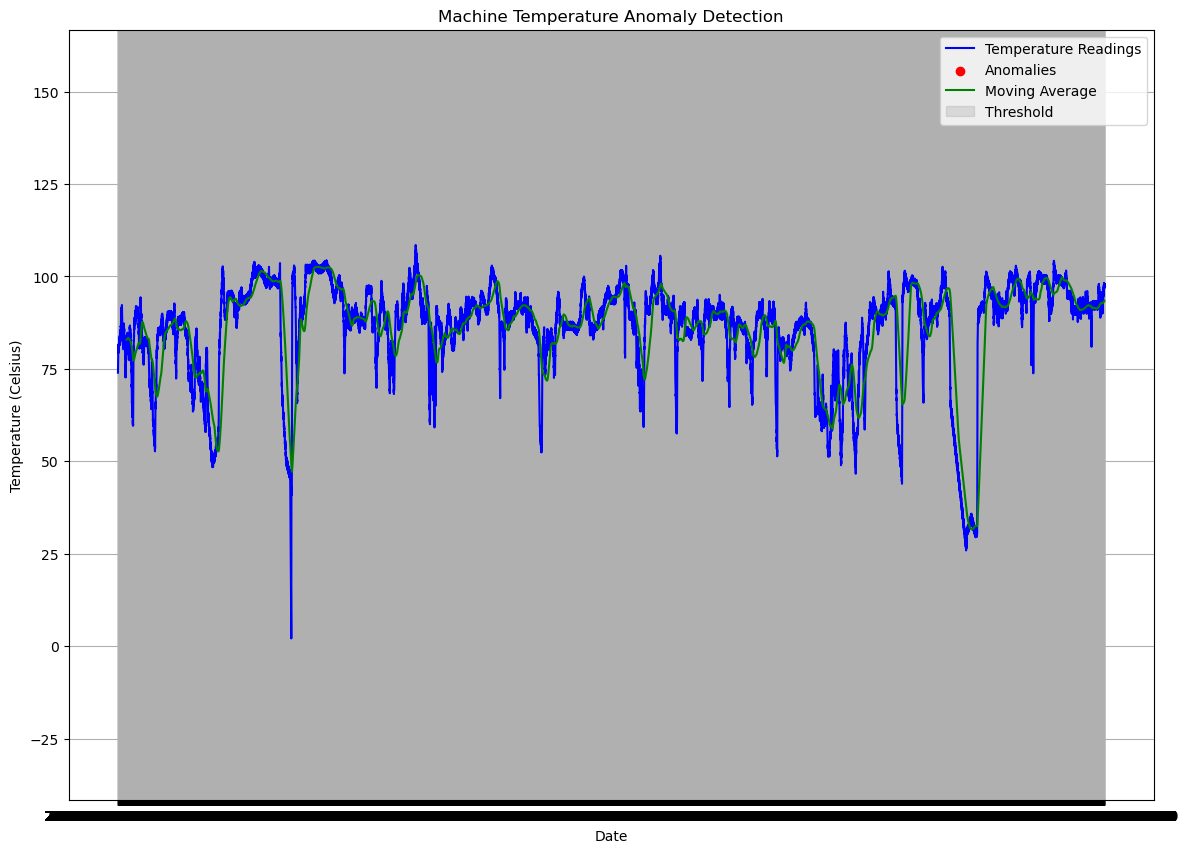

In [16]:
# Plot the temperature readings and the anomalies
plt.subplots(figsize=(14, 10)) # MODIFICATION, inserted
plt.plot(df['timestamp'], df['value'], color='blue', label='Temperature Readings')
plt.scatter(anomalies['timestamp'], anomalies['value'], color='red', label='Anomalies')
plt.plot(df['timestamp'], ma, color='green', label='Moving Average')
plt.fill_between(df['timestamp'], ma-threshold, ma+threshold, color='gray', alpha=0.2, label='Threshold')
plt.legend()
plt.title('Machine Temperature Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.grid() # MODIFICATION, inserted
plt.show()

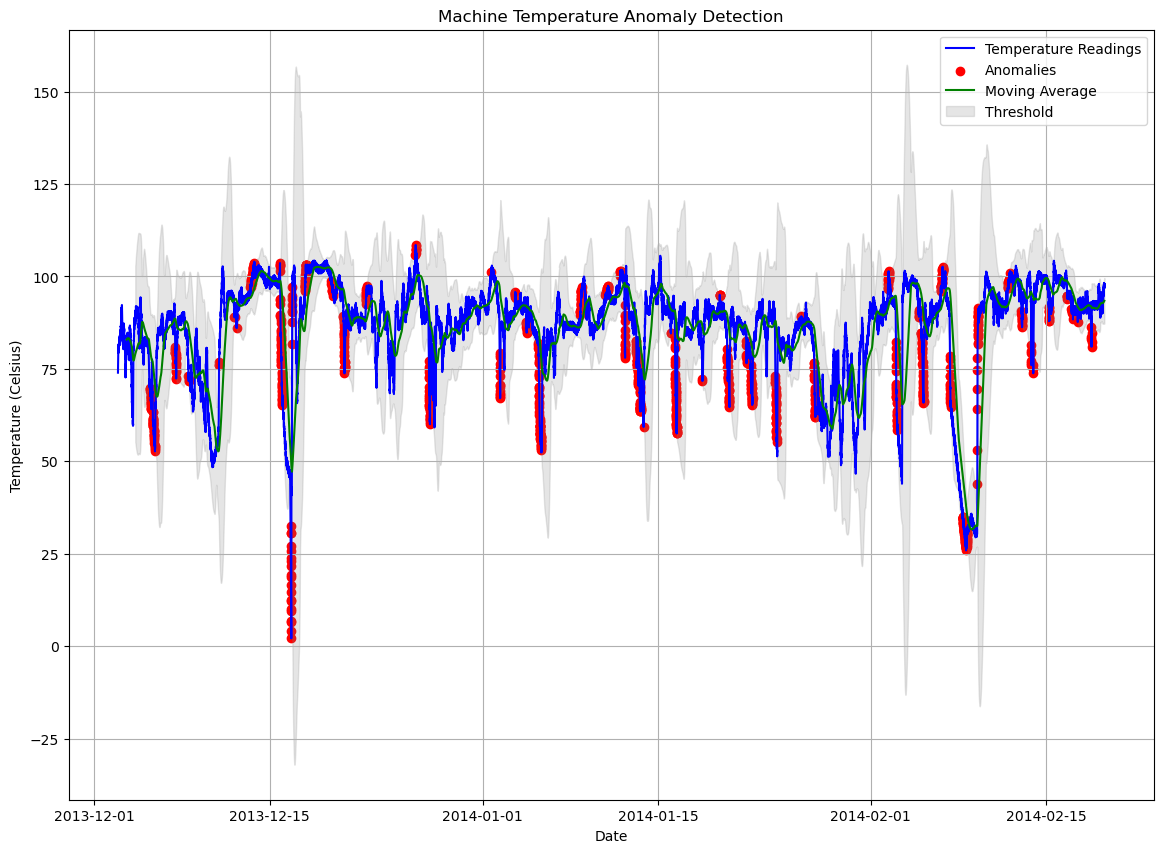

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/machine_temperature_system_failure.csv')

# Convert the timestamp column to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Calculate the moving average of the temperature readings
window_size = 200 # MODIFICATION, original was 50
ma = df['value'].rolling(window_size).mean()

# Calculate the deviation from the moving average
deviation = df['value'] - ma

# Calculate the standard deviation of the deviation
std_deviation = deviation.rolling(window_size).std()

# Calculate the threshold for anomaly detection
threshold = 3 * std_deviation

# Detect anomalies based on deviations from the moving average
anomalies = df[deviation.abs() > threshold]

# Plot the temperature readings and the anomalies
plt.subplots(figsize=(14, 10)) # MODIFICATION, inserted
plt.plot(df['timestamp'], df['value'], color='blue', label='Temperature Readings')
plt.scatter(anomalies['timestamp'], anomalies['value'], color='red', label='Anomalies')
plt.plot(df['timestamp'], ma, color='green', label='Moving Average')
plt.fill_between(df['timestamp'], ma-threshold, ma+threshold, color='gray', alpha=0.2, label='Threshold')
plt.legend()
plt.title('Machine Temperature Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.grid() # MODIFICATION, inserted
plt.show()

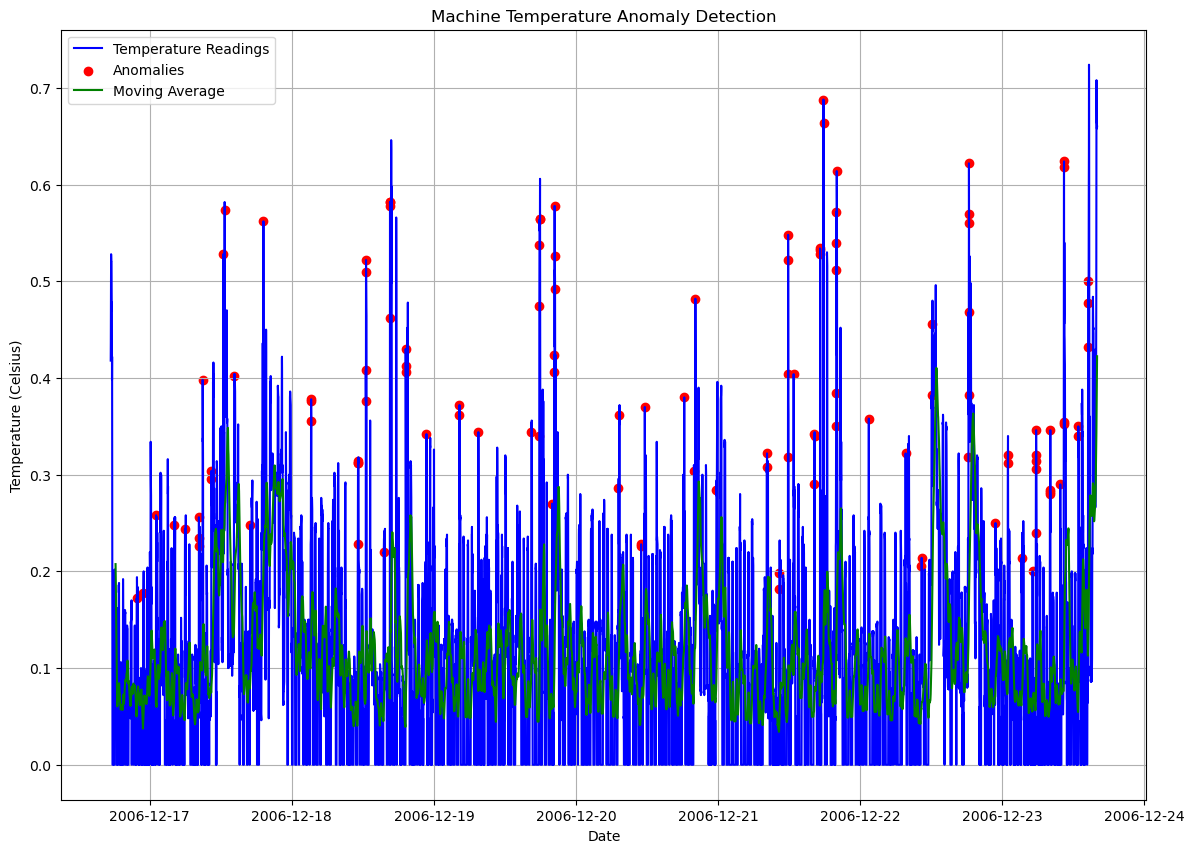

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('household_power_consumption7_limited.csv')

# Convert the timestamp column to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Calculate the moving average of the temperature readings
window_size = 50 # MODIFICATION, original was 50
ma = df['value'].rolling(window_size).mean()

# Calculate the deviation from the moving average
deviation = df['value'] - ma

# Calculate the standard deviation of the deviation
std_deviation = deviation.rolling(window_size).std()

# Calculate the threshold for anomaly detection
threshold = 3 * std_deviation

# Detect anomalies based on deviations from the moving average
anomalies = df[deviation.abs() > threshold]

# Plot the temperature readings and the anomalies
plt.subplots(figsize=(14, 10)) # MODIFICATION, inserted
plt.plot(df['timestamp'], df['value'], color='blue', label='Temperature Readings')
plt.scatter(anomalies['timestamp'], anomalies['value'], color='red', label='Anomalies')
plt.plot(df['timestamp'], ma, color='green', label='Moving Average')
plt.fill_between(df['timestamp'], ma-threshold, ma+threshold, color='gray', alpha=0.2, label='Threshold')
plt.legend()
plt.title('Machine Temperature Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.grid() # MODIFICATION, inserte

In [12]:
print(df)
series = df.set_index('timestamp')['value'].squeeze()

               timestamp  value
0    2006-12-16 17:24:00  0.418
1    2006-12-16 17:25:00  0.436
2    2006-12-16 17:26:00  0.498
3    2006-12-16 17:27:00  0.502
4    2006-12-16 17:28:00  0.528
...                  ...    ...
9995 2006-12-23 15:59:00  0.664
9996 2006-12-23 16:00:00  0.666
9997 2006-12-23 16:01:00  0.658
9998 2006-12-23 16:02:00  0.660
9999 2006-12-23 16:03:00  0.660

[10000 rows x 2 columns]


In [13]:
series = df.set_index('timestamp')['value'].squeeze()

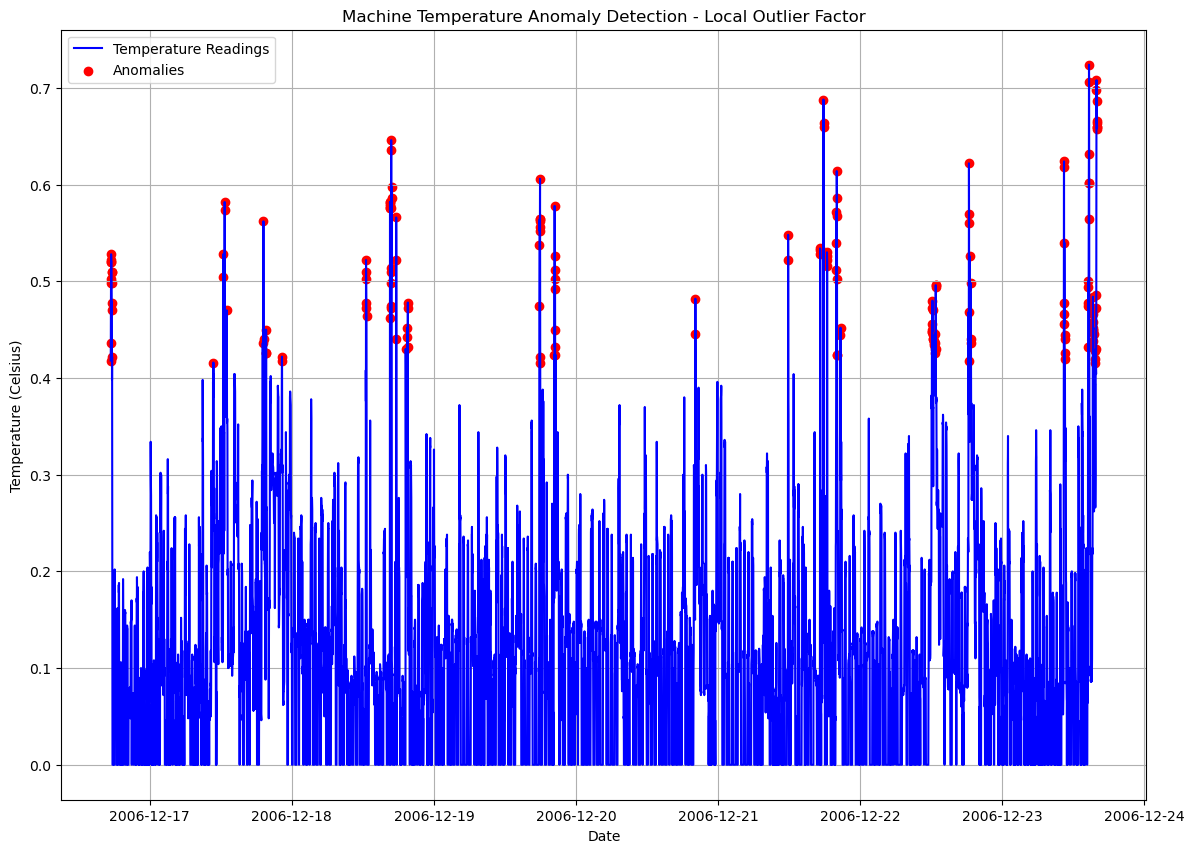

In [53]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

def detect_anomalies_with_local_outlier(series):
    lof = LocalOutlierFactor(n_neighbors=200, contamination=0.025)
    # lof = LocalOutlierFactor(n_neighbors=40, contamination=0.01)
    X = series.values.reshape(-1,1)
    y_pred = lof.fit_predict(X)
    anomalies = X[y_pred==-1]
    return pd.Series(anomalies.flatten(), index=series.index[y_pred==-1])
1
# Detect anomalies using the Isolation Forest algorithm
anomalies = detect_anomalies_with_local_outlier(series)

# Plot the original series and the detected anomalies
plt.subplots(figsize=(14, 10)) 
plt.plot(df['timestamp'], df['value'], color='blue', label='Temperature Readings')
plt.scatter(anomalies.index, anomalies.values, color='red', label='Anomalies')
plt.legend()
plt.title('Machine Temperature Anomaly Detection - Local Outlier Factor')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.grid()
plt.show()